# **BMW Price Prediction**

The aim of this notebook is to develop a model able to predict the price of a second hand BMW given some features. To do so, we have a dataset with 4843 entries composed by features like: power, milleage, colour, fuel type, does it have gps, bluetooth, air conditioning... 

Several models (Linear Regression, Decision Tree, Random Forest) will be built and we will pick the best one that provides us the best approximation. As the problem is a regression the most common metric to compare different models is the root-mean-square error (RMSE). The cost function of most of the models is the Mean Square Error (MSE), the same as RMSE but without the root. 

## **Data Understanding**

In this section, univariate and multivariate analysis will be performed in order to see how the data is distributed, detect outliers, work with data types: numeric, boolean, categorical or object; as well as detect nulls and see correlations.

First of all we import the necessary packages and the dataset


In [267]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import math

In [268]:
path = '/Users/carlosperezricardo/Documents/NuclioDS/bmw_data/'
df = pd.read_csv(path+'bmw_pricing_v2.csv')

df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


We have 17 columns, the column 'precio' is the target we would like to predict. Moreover, we have the column 'fecha_venta' which determines when the vehicle was sold. 

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

### **Univariate Analysis**

In this section a univariate analysis will be discussed. First of all let's begin with the numeric variables.

As we can see the target variable 'precio' is skewed to the right. And most of the values are comprised between 0 and 50.000 euros (in the dataset there are no monetary units established, but from now on let's work in euros).

In [270]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


#### **Numerical variables**

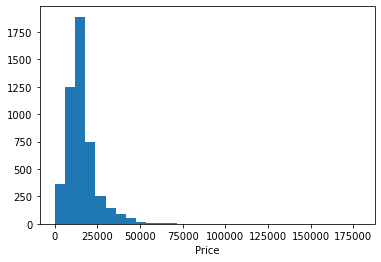

In [271]:
plt.hist(df['precio'], bins=30)
plt.xlabel('Price')
plt.show()

In [272]:
df.sort_values('precio',ascending=False).head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4753,BMW,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,False,False,False,False,True,178500.0,2018-08-01
4684,BMW,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,2018-08-01
90,BMW,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
4146,BMW,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,True,True,False,False,False,True,True,82400.0,2018-04-01
2938,BMW,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01


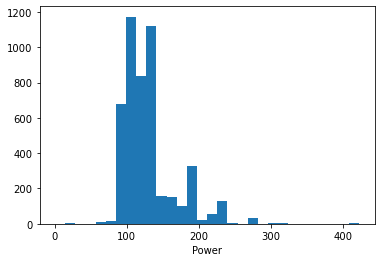

In [273]:
plt.hist(df['potencia'], bins=30)
plt.xlabel('Power')
plt.show()

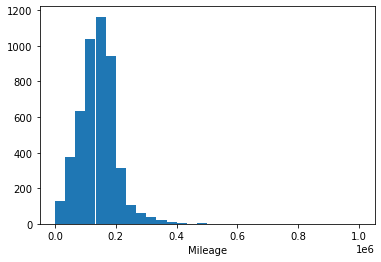

In [274]:
plt.hist(df['km'], bins=30)
plt.xlabel('Mileage')
plt.show()

Combining both numerical entries, one would expect that cars with more power, are usually more expensive. Let's find out if this statement is true.

In the following plot, we can see that there is kind of a linear relation but there are 3 outliers. The 3 most expensive cars are cars that are not in the first quartile of cars with the highest power (which is a little surprising).

There is a correlation of 0.639 between the variables (price and power).

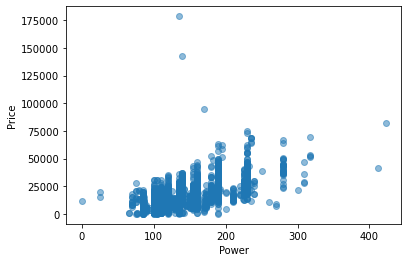

In [275]:
plt.scatter( df['potencia'], df['precio'], alpha=0.5)
plt.ylabel('Price')
plt.xlabel('Power')
plt.show()

In [276]:
df[['potencia', 'km', 'precio']].corr()

,potencia,km,precio
potencia,1.000000,-0.050141,0.639254
km,-0.050141,1.000000,-0.410189
precio,0.639254,-0.410189,1.000000


The same plot but in this case with the mileage on the x-axis. Cars with more mileage normally are sold in a smaller price. However, the data does not look linear, even though the cars with more km on it, are cheaper. This negative relation is observed in the negative of the correlation with -0.41 (not so strong linear correlation).

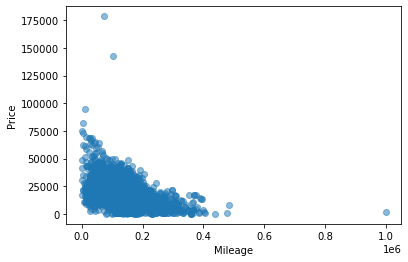

In [277]:
plt.scatter( df['km'], df['precio'], alpha=0.5)
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.show()

Usually with data grouped together as it is happening and the range is large, it is advisable to apply a logarithm, so data is more spread out. 

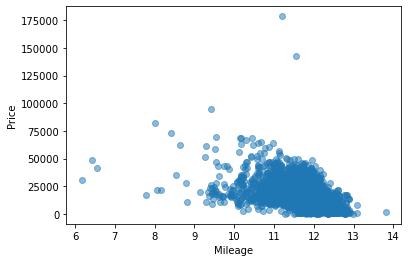

In [278]:
df['km_log'] = df['km'].apply( lambda x: np.log(x) )


plt.scatter( df['km_log'], df['precio'], alpha=0.5)
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.show()

In [279]:
df[['km_log', 'precio']].corr()

,km_log,precio
km_log,1.000000,-0.425964
precio,-0.425964,1.000000


As we can see after applying the logarithm, the value of the correlation is higher, and as one would expect as kilometers go up price of a car decreases. However data is still lumped together.

A normalization into the numerical variables would be applied later. The distribution would have the same shape however the range of values will change; we just scale the data in a more convenient way for the model.

Next step is to analyse the categorical or not numerical beforehand variables. As we can see there are categorical variables such as 'modelo', 'color', 'tipo_coche' or 'tipo_gasolina', boolean types such as 'gps' which indicates if the car has gps installed or not and date variables.

In [280]:
df.describe(exclude = 'number').T

,count,unique,top,freq
marca,4841,1,BMW,4841
modelo,4840,76,320,752
fecha_registro,4842,199,2013-07-01,173
tipo_gasolina,4838,5,diesel,4631
color,4831,10,black,1632
tipo_coche,4834,8,estate,1604
volante_regulable,4839,2,True,2662
aire_acondicionado,4841,2,True,3837
camara_trasera,4841,2,False,3864
asientos_traseros_plegables,4839,2,False,3877


#### **Categorical variables**

In this part, a study of the categorical variables will be carried. First of all, we will start with the variable 'modelo'. The most sold BMW car is 320 (the iconic car who almost anyone had seen in the street once in its life).

Has every 320 been sold at the same price? In this case the data looks more normal distributed, even though it is skewed to the left. 

Moreover, the model 320 has different engines mounted and each engine has different power, as we can see the plot. Most common BMW 320 engines have 120 and 135 hp (horsepower).

In [281]:
df['modelo'].value_counts().sort_values(ascending=False)

320                  752
520                  633
318                  568
X3                   438
116                  358
                    ... 
M5                     1
630                    1
225 Active Tourer      1
735                    1
M135                   1
Name: modelo, Length: 76, dtype: int64

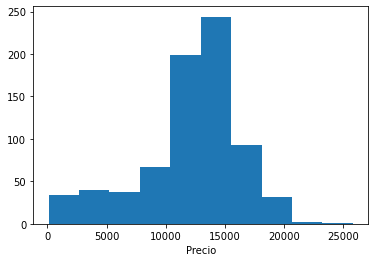

In [282]:
bmw_320 = df[df['modelo'] == '320']

plt.hist(bmw_320['precio'])
plt.xlabel('Precio')
plt.show()

120.0    334
135.0    311
122.0     30
110.0     29
130.0     13
125.0      9
100.0      9
137.0      7
127.0      4
119.0      4
140.0      1
121.0      1
Name: potencia, dtype: int64


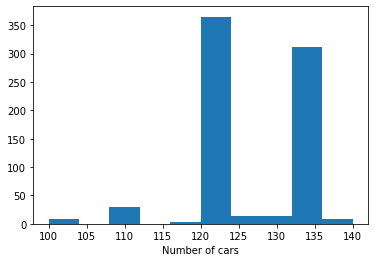

In [283]:
bmw_320 = df[df['modelo'] == '320']

print(bmw_320['potencia'].value_counts())

plt.hist(bmw_320['potencia'])
plt.xlabel('Power')
plt.xlabel('Number of cars')
plt.show()

Next question that come up is that: Which type of car is normally more expensive diesel or gasoline? 

In this case, we have up to 4 different types of fuel: diesel, petrol, hybrid and electro. 
Outliers are in the diesel cars and most of the entries are diesel cars.

In [284]:
df['tipo_gasolina'] = np.where( df['tipo_gasolina'] == 'Diesel', 'diesel', df['tipo_gasolina'] )

In [285]:
def plot_cat_values(dataframe, column, target_column):
    plt.figure(figsize=(15,8))

    ax1 = plt.subplot(2,1,1)

    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.countplot(
        dataframe[column]
    )

    ax2 = plt.subplot(2,1,2, sharex=ax1)

    ## Graficamos la distribución del target  
    ax2 = sns.boxenplot(
        data = dataframe, 
        x = column,
        y = target_column
    )

    plt.show()

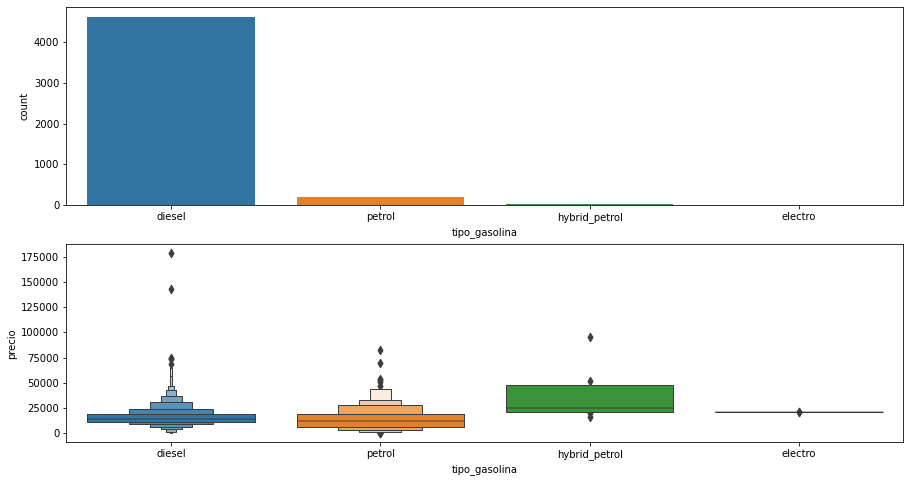

In [286]:
plot_cat_values(df, 'tipo_gasolina', 'precio')

Does color affect on the price? What are the most sold colors? 

There does not seem to be so much difference on the color. One could say the orange are usually more expensive than other colors (by observing the median) but that's because there are fewer orange cars in the dataset.

Most of the cars are black, grey, blue and white. 

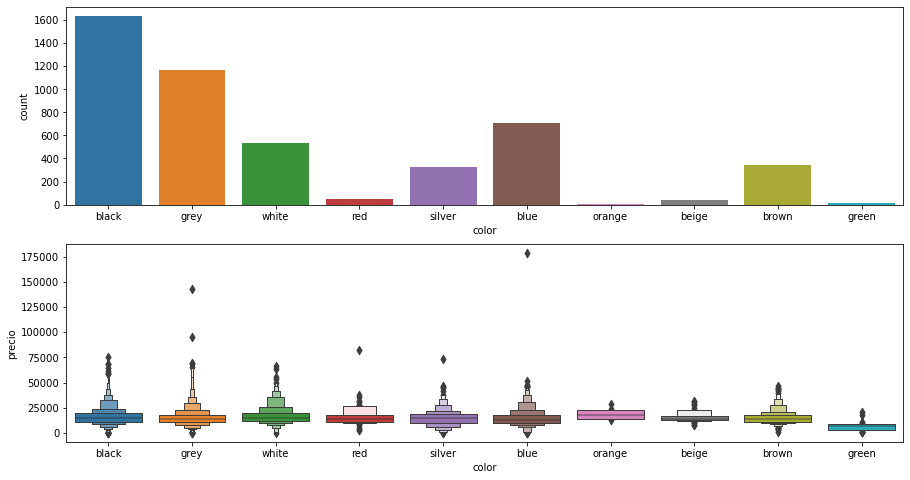

In [287]:
plot_cat_values(df, 'color', 'precio')

Finally, each car is classified by its type (tipo_coche) into coupe, sedan, hatchback, suv or van. As we can see in the plot, the most expensive cars are SUVs however by observing the medians (so in average) coupes are normally more expensive. 

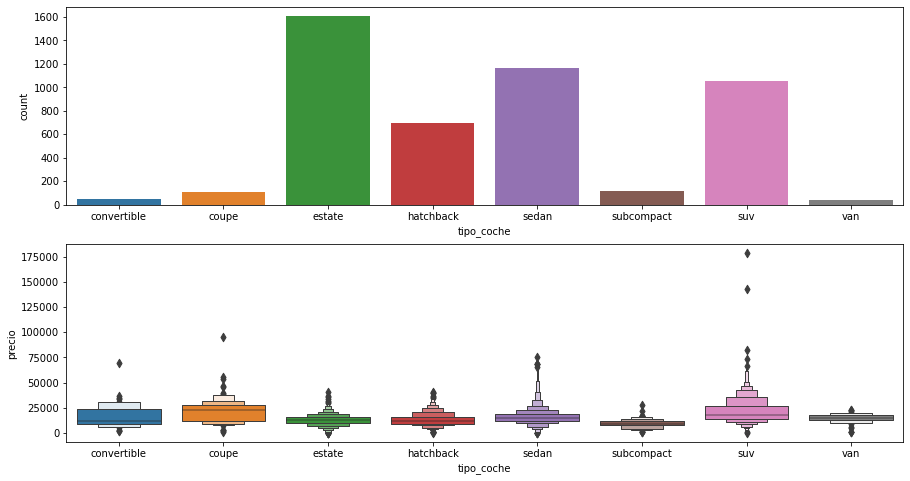

In [288]:
plot_cat_values(df, 'tipo_coche', 'precio')

#### **Time variables**

There are two datetime variables: 'fecha_registro' and 'fecha_venta'. The first one is the date when the car was probably bought by the first owner and the last one when it was sold.

What's surprising is that there are actually some cars that were sold even before they were registered. It sometimes happens that some models are bought even before they are manufactured as there is some hype about the model (this happened with the first Tesla, the Tesla Roadster), but in second-hand?

In [289]:
df['fecha_registro'] = pd.to_datetime(df['fecha_registro'])
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

df['antiquity'] = (df['fecha_venta'] - df['fecha_registro'])/np.timedelta64(1, 'Y')

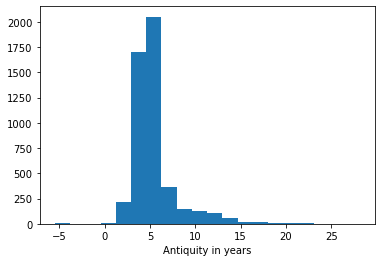

In [290]:
plt.hist(df['antiquity'], bins=20)
plt.xlabel('Antiquity in years')
plt.show()

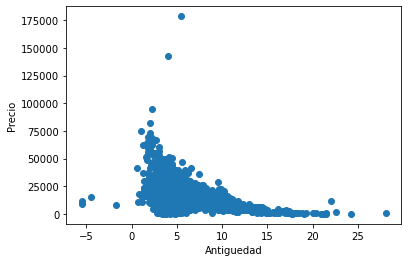

In [291]:
plt.scatter(data = df, x='antiquity', y='precio')
plt.xlabel('Antiguedad')
plt.ylabel('Precio')
plt.show()

In [292]:
df[['antiquity','precio']].corr()

,antiquity,precio
antiquity,1.000000,-0.441056
precio,-0.441056,1.000000


In [293]:
antig_min = df['antiquity'].min()
antig_min

-5.500455177039912

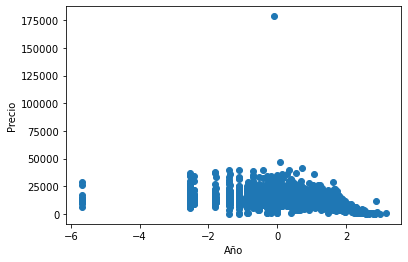

In [294]:
df['antiquity_log'] = df['antiquity'].apply( lambda x: np.log(x + antig_min + 1) )
plt.scatter(data = df, x='antiquity_log', y='precio')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

In [295]:
df[['antiquity_log','precio']].corr()

,antiquity_log,precio
antiquity_log,1.000000,-0.341985
precio,-0.341985,1.000000


In [296]:
df.drop('antiquity_log', axis=1, inplace=True)

As antiquity decreases the price goes up.

Let's plot now the time series of the number of cars sold each day and each month. It seems there is a gap between 2011 and 2017, and there is no data between.

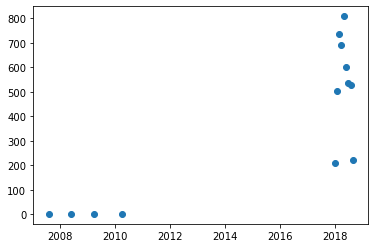

In [297]:
same_date = df.groupby('fecha_venta')['marca'].count()

plt.scatter(same_date.index, same_date)
plt.show()

As we can see in the following plot, the mean of 'younger' cars is more expensive. The average by day plot seems to have an exponential shape and it won't be fitted by a linear model. 

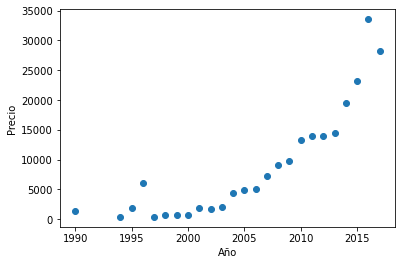

In [298]:
df['year'] = df['fecha_registro'].dt.year

same_date_registro = df.groupby('year')['precio'].mean()

plt.scatter(same_date_registro.index, same_date_registro)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

In [299]:
df[['year','precio']].corr()

,year,precio
year,1.000000,0.450352
precio,0.450352,1.000000


In [300]:
df[['year','precio']].corr('spearman')

,year,precio
year,1.00000,0.49197
precio,0.49197,1.00000


We apply a logarithm to the price, it is the opposite of doing the exponential of the year. As we can see correlation gets higher. So as we want to keep the price in the same scale for all variables, we want to convert the year variable to exponential. However it is easier computionally to convert a number to logarithm instead of doing the exponential (number too large).

$$y = log_e(x) \rightarrow x = e^y$$

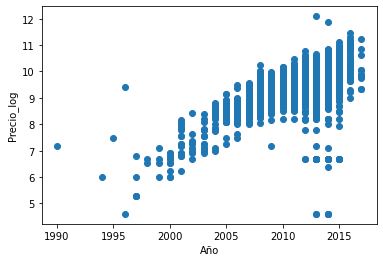

In [301]:
df['precio_log'] = df['precio'].apply( lambda x: np.log(x) )

plt.scatter(df['year'], df['precio_log'])
plt.xlabel('Año')
plt.ylabel('Precio_log')
plt.show()

In [302]:
df[['year','precio_log']].corr()

,year,precio_log
year,1.000000,0.616197
precio_log,0.616197,1.000000


In [303]:
year_min = round(df['year'].min())
df['year_exp'] = df['year'].apply( lambda x: math.e** (x - year_min )  )
df[['year_exp','precio']].corr()

,year_exp,precio
year_exp,1.000000,0.367225
precio,0.367225,1.000000


Correlation has even decreased with this transformation.

In [304]:
print(df['fecha_venta'].min())
print(df['fecha_venta'].max())

2007-08-01 00:00:00
2018-09-01 00:00:00


It is important to mention that fecha_venta and fecha_registro variables won't be used to predict the price of a car. As the 'fecha_registro' is the date when the car is listed and the 'fecha_venta' is totally unknown. So no futher analysis will be carried with these variables. However the antiquity of the car will be used to built the model.

#### **Boolean variables**

In this case, we will work with variables such as 'gps', 'bluetooth', 'aire_acondicionado'... Someone would expect that if the value of one of those is True, normally the price would tend to go up; as the car has more extras.

However as seen with the violin plots, this not true for most of the cars. And it is quite strange that the most expensive cars do not normally have these extras. At least the most expensive car which has a price of 178500.0 does not have gps, volante_regulable, bluetooth... So the analysis carried out does not support the hyphotesis (a statistical test could be performed).

In [305]:
boolean_cols = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad']

In [306]:
def plot_boolean(dataframe, column, target_column):
    plt.figure(figsize=(15,8))

    ax1 = plt.subplot(2,1,1)

    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.countplot(
        dataframe[column]
    )

    ax2 = plt.subplot(2,1,2, sharex=ax1)
 
    ax2 = sns.violinplot(
        data = dataframe[dataframe[target_column] > 0], 
        x = column,
        y = target_column
    )

    plt.show()

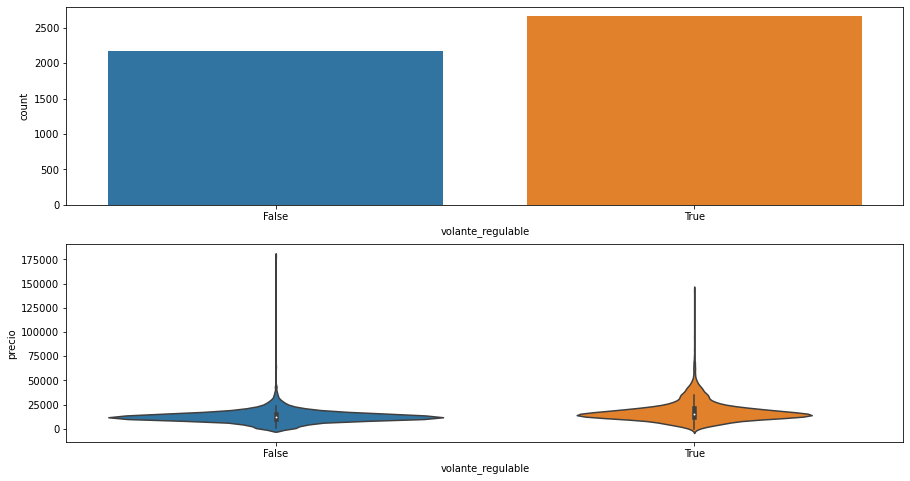

In [307]:
import warnings
warnings.filterwarnings("ignore")
plot_boolean(df, 'volante_regulable', 'precio')

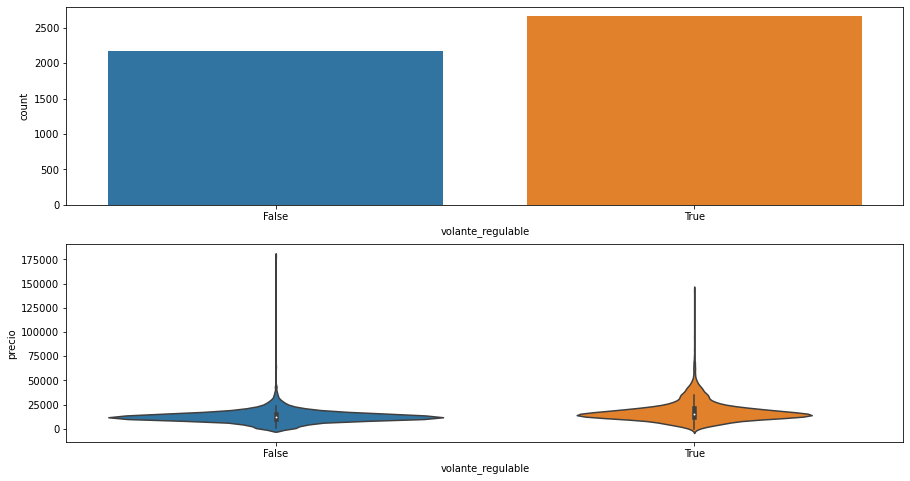

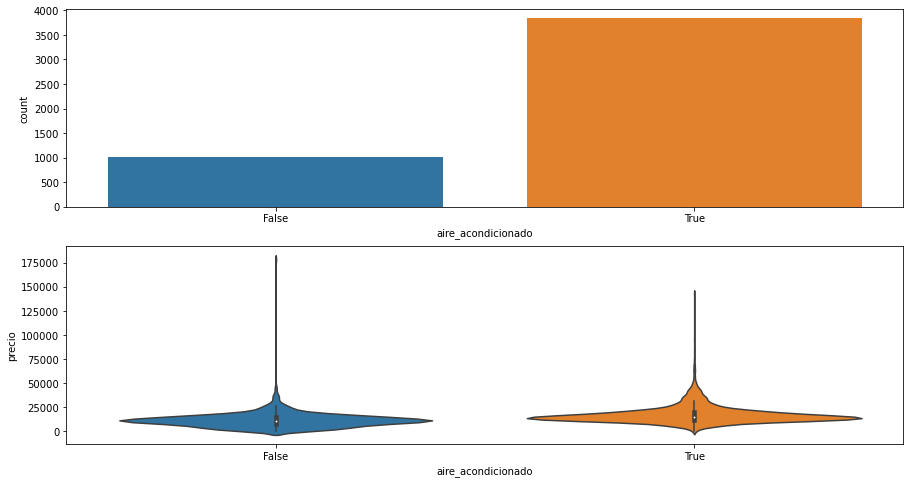

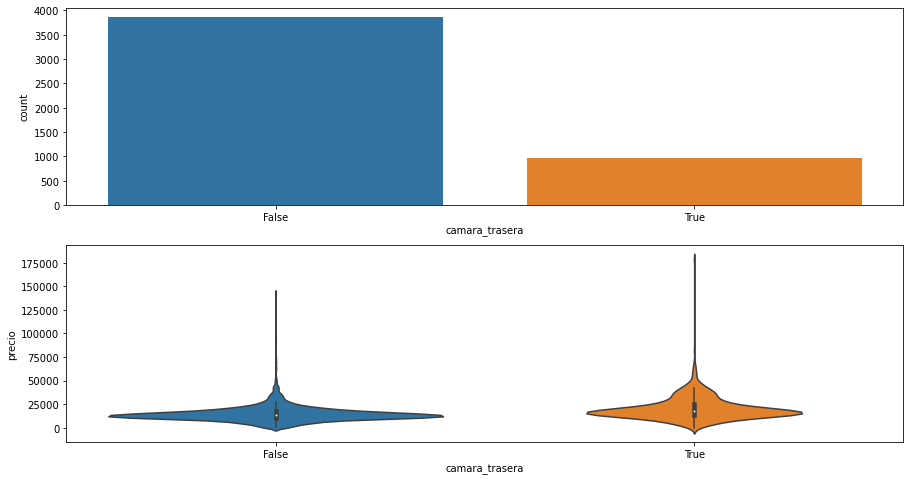

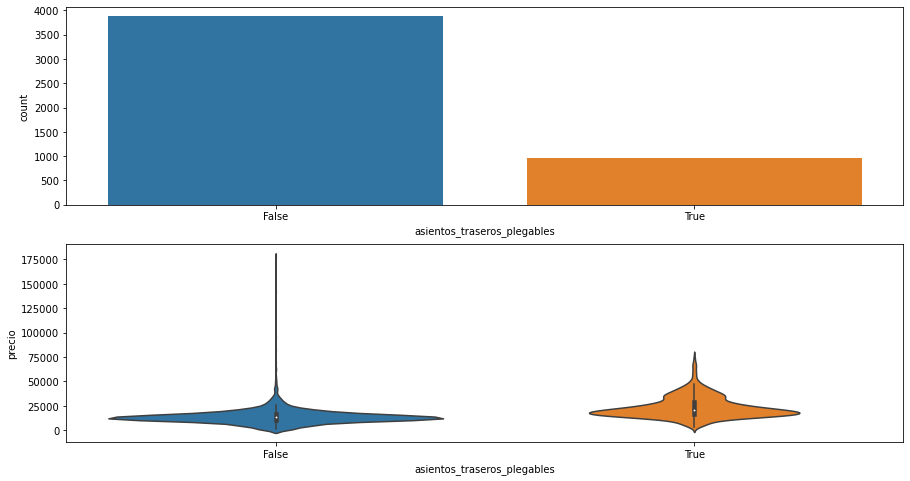

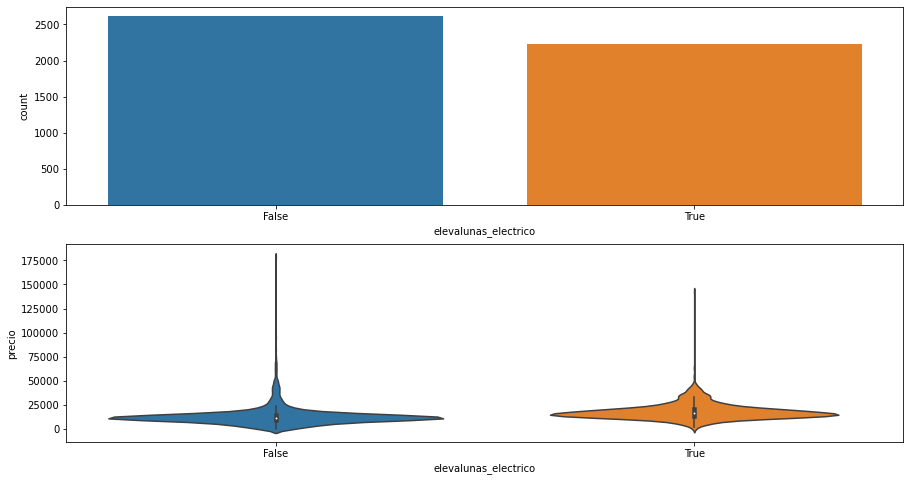

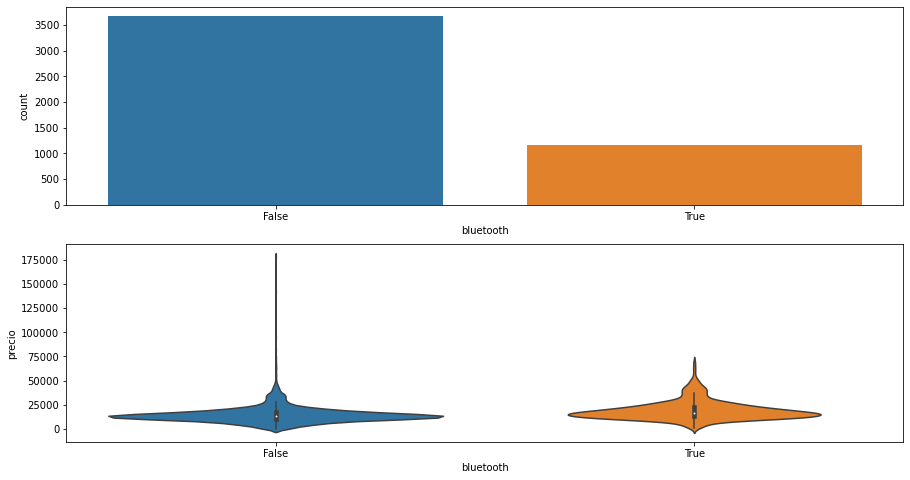

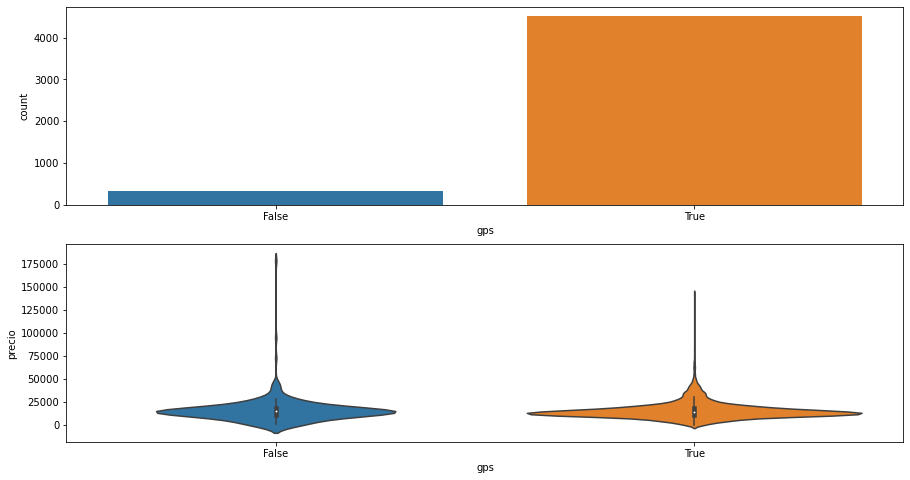

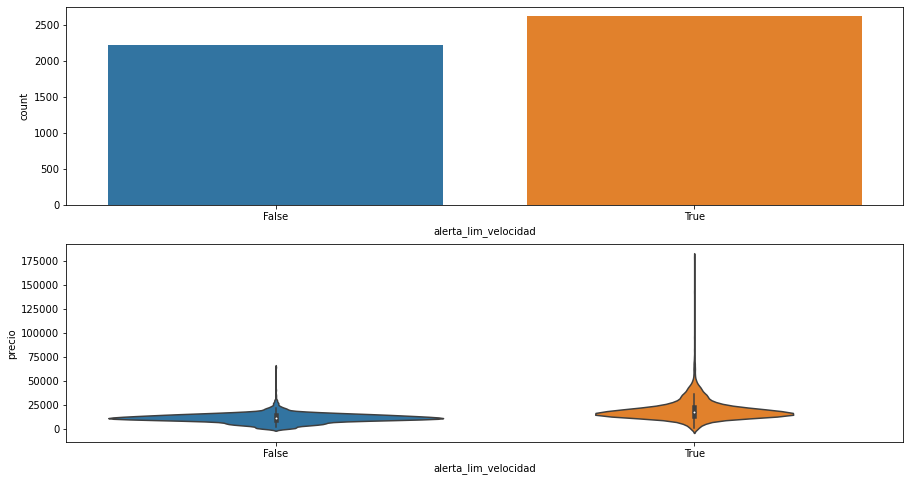

In [308]:
for col, i in zip(boolean_cols, range(len(boolean_cols))):
    plot_boolean(df, col, 'precio')

plt.show()

## **Construction of the model**

After the EDA, the model will be built. In this section several models will be tested. But first of all, values must be clean, so no outliers, nulls or wrong data will be worked.

After the pre-processing of the data, we will divide the dataset into 3 parts: training, test and validation.

### **Cleaning data**

In this part we will clean data from outliers and nulls in this dataset fortunately we do not have many nulls, unfortunately we have at least one in all columns. So let's dig on it:

In [309]:
df.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
km_log                          3
antiquity                       2
year                            1
precio_log                      6
year_exp                        1
dtype: int64

For example, for 'marca' we can impute that it is 'BMW', as there is only one type of manufacturer. However this variable won't be used in the model as it does not offer any value to the prediction.

Let's see if there are rows that held most the nulls so dropping these entries won't affect so much the size of the data. We only sacrifice 60 entries from 4843, so it does not sound like bad idea.

In [310]:
df.drop(columns='marca', axis=1, inplace=True)

In [311]:
print('With nulls: ',df.shape[0])
print('Without nulls: ',df.dropna(how='any').shape[0])

With nulls:  4843
Without nulls:  4782


Let's say we would like to keep all columns: 
- For the 'modelo', we cannot guess the name, so we can input a default model, like 'No Model'. 
- For the 'km', we can impute the median. And as there are fewer values this won't affect so much, and won't add noise to the predictor.
- For the 'potencia', we could check if there are more models like the register and impute the mode or median.
- For the 'tipo_gasolina', we should introduce 'Not Known'
- For the 'color', we should introduce 'Not Known'
- For the 'tipo_coche', we should introduce 'Not Known'
- For the boolean variables, I would suggest to introduce a False. For example if a car has gps, normally it is noted.
- For the price, I will drop these entries as they are the target variable.

In [312]:
df_clean = df.dropna(how='any')

df_clean.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
km_log                         0
antiquity                      0
year                           0
precio_log                     0
year_exp                       0
dtype: int64

#### **Detecting outliers**

There are some outliers, especially in the target variable, that should be discussed.

For example, a new BMW X3 M Competition is worth 115.000 euros today. It probably costed much more when it was firstly released in 2013, but the price that appears (178.500 euros) is an outlier. A car from 2013 with 72.515 km and sold for 178.500 in 2018, seems really strange.

In [313]:
df_clean.sort_values('precio',ascending=False).head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,km_log,antiquity,year,precio_log,year_exp
4753,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,...,False,False,True,178500.0,2018-08-01,11.191549,5.418318,2013.0,12.092344,9.744803e+09
4684,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,...,False,True,True,142800.0,2018-08-01,11.544637,4.000082,2014.0,11.869200,2.648912e+10
90,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,...,False,False,True,95200.0,2018-04-01,9.425613,2.247822,2016.0,11.463735,1.957296e+11
4146,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,True,True,...,False,True,True,82400.0,2018-04-01,7.996317,1.998672,2016.0,11.319341,1.957296e+11
4731,X5 M,4530.0,230.0,2016-07-01,diesel,silver,suv,True,True,False,...,False,False,True,73100.0,2018-08-01,8.418477,2.083547,2016.0,11.199584,1.957296e+11
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,...,True,True,True,69700.0,2018-02-01,9.541728,1.837136,2016.0,11.151956,1.957296e+11
3595,740,34624.0,235.0,2016-06-01,diesel,grey,sedan,True,True,True,...,True,True,True,68700.0,2018-09-01,10.452302,2.250560,2016.0,11.137504,1.957296e+11
3320,740,25858.0,235.0,2016-06-01,diesel,black,sedan,True,True,False,...,False,True,True,68300.0,2018-06-01,10.160375,1.998672,2016.0,11.131665,1.957296e+11
3345,740,25571.0,235.0,2016-06-01,diesel,black,sedan,True,True,False,...,False,True,True,68300.0,2018-06-01,10.149214,1.998672,2016.0,11.131665,1.957296e+11
4749,X6,29460.0,280.0,2015-12-01,diesel,white,suv,True,True,True,...,True,True,True,66600.0,2018-08-01,10.290789,2.666721,2015.0,11.106460,7.200490e+10


In [314]:
df_clean.sort_values('fecha_registro').head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,km_log,antiquity,year,precio_log,year_exp
2771,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,...,False,False,False,1300.0,2018-04-01,11.897854,28.085450,1990.0,7.170120,1.000000
3062,318,98097.0,85.0,1994-01-01,petrol,blue,sedan,True,False,False,...,False,True,True,400.0,2018-04-01,11.493712,24.246904,1994.0,5.991465,54.598150
25,318,196092.0,85.0,1995-10-01,petrol,blue,convertible,True,False,False,...,False,False,False,1800.0,2018-05-01,12.186339,22.582257,1995.0,7.495542,148.413159
41,M3,270907.0,236.0,1996-08-01,petrol,black,convertible,True,False,False,...,True,True,False,12100.0,2018-08-01,12.509531,21.999083,1996.0,9.400961,403.428793
2829,525,439060.0,105.0,1996-10-01,diesel,silver,sedan,False,False,True,...,False,True,False,100.0,2018-03-01,12.992391,21.413171,1996.0,4.605170,403.428793
3380,525,245302.0,105.0,1997-01-01,diesel,green,sedan,False,True,False,...,False,True,True,900.0,2018-06-01,12.410245,21.413171,1997.0,6.802395,1096.633158
2611,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,...,False,True,False,200.0,2018-08-01,12.346982,21.084622,1997.0,5.298317,1096.633158
2473,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,...,False,True,False,200.0,2018-08-01,12.348344,21.084622,1997.0,5.298317,1096.633158
2574,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,...,False,True,False,200.0,2018-08-01,12.345313,21.084622,1997.0,5.298317,1096.633158
3575,316,359661.0,75.0,1997-09-01,petrol,grey,sedan,False,False,False,...,False,True,False,400.0,2018-08-01,12.792917,20.914872,1997.0,5.991465,1096.633158


In [315]:
x = df_clean.sort_values('precio',ascending=False).head(5)
print(x.iloc[3])

new_max_price = x.iloc[3]['precio']

modelo                                        X6 M
km                                            2970
potencia                                       423
fecha_registro                 2016-04-01 00:00:00
tipo_gasolina                               petrol
color                                          red
tipo_coche                                     suv
volante_regulable                             True
aire_acondicionado                            True
camara_trasera                                True
asientos_traseros_plegables                  False
elevalunas_electrico                         False
bluetooth                                    False
gps                                           True
alerta_lim_velocidad                          True
precio                                       82400
fecha_venta                    2018-04-01 00:00:00
km_log                                     7.99632
antiquity                                  1.99867
year                           

In [316]:
df_clean['precio'] = np.where( df_clean['precio'] > new_max_price*1.1, new_max_price, df_clean['precio'] )

There are entries with negative mileage so we impose 0 in these cases. There are cars with a power of 0, which is not realistic.

And cars sold at 100 euros, which could be possible, but very uncommon.

In [317]:
df_clean['km'] = np.where( df_clean['km'] < 0, 0, df_clean['km'] )

Next step is to convert the categorical columns into numerical columns, by changing them to ordinal, grouping by or using a One Hot Encoder.

These variables are the ones like: 'tipo_gasolina', 'color', 'tipo_coche' and 'modelo'.

In [318]:
categorical_cols = ['tipo_gasolina', 'color', 'tipo_coche', 'modelo']

for col in categorical_cols:
    print(col)
    col_vc = df_clean[col].value_counts()
    print(len(col_vc))

tipo_gasolina
4
color
10
tipo_coche
8
modelo
76


### **Converting categorical to ordinal data**

Before doing the one hot encoding of the variables, let's take a look to 'modelo'. As we see we have 76 different models, if we run a model with 76 more columns, as it has been observed when testing the model, 'modelo' columns do not have any importance (and intuitevely this fact does not make sense). So instead of hot encoding this variable, let's convert it to ordinal. 

Each model in the variable 'modelo' has a number in it, so for example for the SUV models a new X7 is normally more expensive than a X5 so as the first number gets higher, the 'better' the car is. There might be some discrepances as for BMW models with the letter M are the high-tech and more luxurious model (the same happens with RS from Audi, AMG from Mercedes, Cupra with SEAT or RSport from Renault). So a new M3 is more expensive than a 550 model. 

There are some cars without a number on it, so we would have to assign a value. 

In [319]:
df_clean['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [320]:
modelo_ordinal = {}
modelo_M = {}

for model in df_clean['modelo'].unique():
    found = False
    M_found = False
    for char, i in zip(model, range(len(model))):
        try:
            if found == False:
                modelo_ordinal[model] = int(char)
                found = True
            #break
        except:
            pass
        
        if char == 'M': 
            M_found = True
        
        if i == len(model)-1:
            if M_found == True:
                modelo_ordinal[model] = modelo_ordinal[model] + 1
                modelo_M[model] = 1
            else:
                modelo_M[model] = 0    

modelo_ordinal[' Active Tourer'] = 1

modelo_ordinal

{'118': 1,
 'M4': 5,
 '320': 3,
 '420': 4,
 '425': 4,
 '335': 3,
 '325': 3,
 'Z4': 4,
 '120': 1,
 '220': 2,
 '650': 6,
 '135': 1,
 '218': 2,
 '318': 3,
 '430': 4,
 'M3': 4,
 '330': 3,
 '225': 2,
 'M235': 3,
 '316': 3,
 '435': 4,
 '640': 6,
 '640 Gran Coupé': 6,
 '435 Gran Coupé': 4,
 'i8': 8,
 '630': 6,
 '430 Gran Coupé': 4,
 '635': 6,
 '520': 5,
 '525': 5,
 '530': 5,
 '535': 5,
 '320 Gran Turismo': 3,
 '518': 5,
 '116': 1,
 '328': 3,
 '523': 5,
 'X3': 3,
 'M550': 6,
 '528': 5,
 '325 Gran Turismo': 3,
 '125': 1,
 '318 Gran Turismo': 3,
 '420 Gran Coupé': 4,
 'i3': 3,
 '114': 1,
 '520 Gran Turismo': 5,
 '530 Gran Turismo': 5,
 'M135': 2,
 '418 Gran Coupé': 4,
 '330 Gran Turismo': 3,
 '335 Gran Turismo': 3,
 '730': 7,
 '123': 1,
 '535 Gran Turismo': 5,
 '740': 7,
 '750': 7,
 'ActiveHybrid 5': 5,
 '735': 7,
 'M5': 6,
 'X5': 5,
 'X1': 1,
 'X4': 4,
 'X6': 6,
 'X6 M': 7,
 'X5 M': 6,
 'X5 M50': 6,
 '218 Active Tourer': 2,
 '218 Gran Tourer': 2,
 '216': 2,
 '220 Active Tourer': 2,
 '216 Gran T

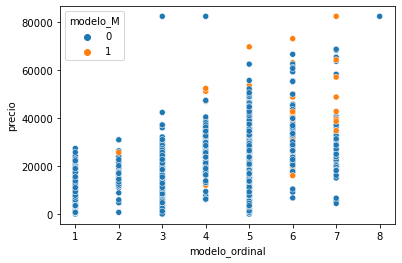

In [321]:
df_clean['modelo_ordinal'] = df_clean['modelo'].replace(modelo_ordinal)
df_clean['modelo_M'] = df_clean['modelo'].replace(modelo_M)
#df_clean['modelo_ordinal'] = df_clean['modelo_ordinal'].astype('str')

sns.scatterplot( data=df_clean, x='modelo_ordinal', y='precio', hue='modelo_M' )
plt.show()

We finally do the one hot encoding of the categorical variables. Notice that we have dropped 'modelo' as we could convert it to ordinal.

This action leads to a reduction in the columns in the dataframe. Less columns the more control we have of the model and the simpler the model would be. And moreover, this action leads to an improvement in the score, however not a huge improvement. 

More not useful columns are dropped as we have observed after running the model that their feature importance is 0 ('color' and 'tipo_gasolina' mostly). So we simplify the model.

In [322]:
categorical_cols = ['tipo_coche'] # 'tipo_coche', 'tipo_gasolina', 'color', 'modelo', 'modelo_ordinal'

In [323]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder

model_df = df_clean.copy(deep=True)

for col in categorical_cols:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(np.array(model_df[col]).reshape(-1, 1))
    categories = enc.categories_
    matrix = enc.transform( np.array(model_df[col]).reshape(-1, 1) ).toarray()
    for x, i in zip(categories, range(len(categories))):
        model_df[col+'_'+x] = matrix[i,:]

In [324]:
for col in categorical_cols:
    model_df.drop(columns=col, axis=1, inplace=True)

In [325]:
model_df.shape

(4782, 31)

In [326]:
list(model_df.columns)

['modelo',
 'km',
 'potencia',
 'fecha_registro',
 'tipo_gasolina',
 'color',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad',
 'precio',
 'fecha_venta',
 'km_log',
 'antiquity',
 'year',
 'precio_log',
 'year_exp',
 'modelo_ordinal',
 'modelo_M',
 'tipo_coche_convertible',
 'tipo_coche_coupe',
 'tipo_coche_estate',
 'tipo_coche_hatchback',
 'tipo_coche_sedan',
 'tipo_coche_subcompact',
 'tipo_coche_suv',
 'tipo_coche_van']

After cleaning the data, we normalize the features so all features are within the same range so the model sees them as 'equally'. The only columns that we have to scale are the numerical ones: price, power and milleage.

For the case of the price as it is the target variable we will use both the scaled (with StandardScaler) and the not scaled version, where as for the 'km' and 'potencia' we will use a StandardScaler and the MixManScaler.

In [327]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

price_scaler = StandardScaler()
price_scaler.fit( np.array(model_df['precio']).reshape(-1, 1) )
model_df['scaled_price'] = price_scaler.transform( np.array(model_df['precio']).reshape(-1, 1) )

power_scaler = MinMaxScaler()
power_scaler.fit( np.array(model_df['potencia']).reshape(-1, 1) )
model_df['scaled_power'] = power_scaler.transform( np.array(model_df['potencia']).reshape(-1, 1) )

km_scaler = StandardScaler()
km_scaler.fit( np.array(model_df['km']).reshape(-1, 1) )
model_df['scaled_km'] = km_scaler.transform( np.array(model_df['km']).reshape(-1, 1) )

delete_cols = ['precio','potencia','km']

In [328]:
#for col in delete_cols:
#    df_clean.drop(columns=col, axis=1, inplace=True)

There features that we have to avoid because they include the target, datetime variables and other variables that we prefer to not work with them in the model. So, we can extract the X matrix and the target vector y. 

There are a total 22 features in the X matrix.

In [329]:
avoid = ['precio','scaled_price','fecha_registro','fecha_venta','modelo']
#avoid.append('scaled_power'); 
avoid.append('potencia'); 
avoid.append('scaled_km')
#avoid.append('km')
#avoid.append('modelo_M')
#avoid.append('modelo_ordinal')
avoid.append('color')
#avoid.append('antiquity')
avoid.append('tipo_gasolina')
avoid.append('tipo_coche')

variables = list(set(model_df.columns).difference(set(avoid)))
len(variables)

25

In [330]:
variables

['modelo_M',
 'tipo_coche_hatchback',
 'tipo_coche_convertible',
 'modelo_ordinal',
 'gps',
 'tipo_coche_sedan',
 'asientos_traseros_plegables',
 'precio_log',
 'km_log',
 'year',
 'bluetooth',
 'km',
 'alerta_lim_velocidad',
 'antiquity',
 'scaled_power',
 'elevalunas_electrico',
 'tipo_coche_coupe',
 'aire_acondicionado',
 'camara_trasera',
 'year_exp',
 'tipo_coche_van',
 'tipo_coche_subcompact',
 'tipo_coche_suv',
 'tipo_coche_estate',
 'volante_regulable']

In [331]:
#y = np.array(model_df['scaled_price'])
y = np.array(model_df['precio'])

X = np.array(model_df[variables])

### **Training and Test Datasets**

Before continuing, we divide the data into: train, test and validation.

In [332]:
from sklearn.model_selection import train_test_split 

X_train_test, X_validation, y_train_test, y_validation = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size = 0.30, random_state = 42)

#### **Linear Regression**

This is the simplest model, it tries to fit the data with a linear model with the following expression:

$$y = a_0 + b_0 \cdot x_0 + b_1 \cdot x_1 + \; ... \;+ b_n \cdot x_n$$

The cost function is directly connected to the MSE and it tries to fine a model with the lowest MSE value.

In [333]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [334]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

y_pred_train = lin_reg.predict(X_train)

print('MSE train:')
print(MSE(y_train, y_pred_train))

print('MSE test:')
print(MSE(y_test, y_pred))

print('R2 score:')
print(r2_score(y_test, y_pred))

MSE train:
12088686.240078142
MSE test:
12179707.226573274
R2 score:
0.8514721398188492


As we can see both the MSE in the train and the test set are of similar magnitud and the $R^2$ score is 0.722 which ensures that a Linear Regression for this problem it is not a bad solution. In the following piece of code we can observed the actual value and the predicted value of an entry.

In [335]:
results_df = pd.DataFrame( y_test , columns=['actual'])
results_df['predicted'] = y_pred
results_df

,actual,predicted
0,18000.0,16161.882381
1,12300.0,11741.049792
2,11400.0,11734.068073
3,11500.0,12263.548729
4,8400.0,8748.442866
...,...,...
1143,41100.0,30471.411097
1144,14300.0,17796.247097
1145,17800.0,21731.178531
1146,7300.0,8539.414547


We can also try a polynomical regression so you can fit the data with a $x^2$ or $x^3$, and even allow interaction between terms $x \cdot y$. In this case we will test a second degree with interaction between terms: 

In [336]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

str = ''
for x in list(poly_features.get_feature_names()):
    str = str + ', ' + x
print(str)

, x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x0^2, x0 x1, x0 x2, x0 x3, x0 x4, x0 x5, x0 x6, x0 x7, x0 x8, x0 x9, x0 x10, x0 x11, x0 x12, x0 x13, x0 x14, x0 x15, x0 x16, x0 x17, x0 x18, x0 x19, x0 x20, x0 x21, x0 x22, x0 x23, x0 x24, x1^2, x1 x2, x1 x3, x1 x4, x1 x5, x1 x6, x1 x7, x1 x8, x1 x9, x1 x10, x1 x11, x1 x12, x1 x13, x1 x14, x1 x15, x1 x16, x1 x17, x1 x18, x1 x19, x1 x20, x1 x21, x1 x22, x1 x23, x1 x24, x2^2, x2 x3, x2 x4, x2 x5, x2 x6, x2 x7, x2 x8, x2 x9, x2 x10, x2 x11, x2 x12, x2 x13, x2 x14, x2 x15, x2 x16, x2 x17, x2 x18, x2 x19, x2 x20, x2 x21, x2 x22, x2 x23, x2 x24, x3^2, x3 x4, x3 x5, x3 x6, x3 x7, x3 x8, x3 x9, x3 x10, x3 x11, x3 x12, x3 x13, x3 x14, x3 x15, x3 x16, x3 x17, x3 x18, x3 x19, x3 x20, x3 x21, x3 x22, x3 x23, x3 x24, x4^2, x4 x5, x4 x6, x4 x7, x4 x8, x4 x9, x4 x10, x4 x11, x4 x12, x4 x13, x4 x14, x4 x15, x4 x16, x4 x17, x4 x18, x4 x19, x4 x20, x4 x21, x4 x22, x4 x23, x4 x24, x5^2, x5

In [337]:
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

y_pred = poly_reg.predict(X_test)

y_pred_train = poly_reg.predict(X_train)

print('MSE train:')
print(MSE(y_train, y_pred_train))

print('MSE test:')
print(MSE(y_test, y_pred))

print('R2 score:')
print(r2_score(y_test, y_pred))

MSE train:
12088686.240078142
MSE test:
12179707.226573274
R2 score:
0.8514721398188492


The result for a 2nd degree is exactly the same. 

#### **Decision Tree** 

In this part, we will try a DecisionTreeRegressor, we establish the criterion to reduce the MSE, and we tune a little bit the hyperparameters max_depth ad min_samples_leaf. 

As we observe with a Decision Tree we are able to obtain a better score in the training set (much better than the Linear Regression), however the error is greater in the test set. So the model is overfitting the data, even though the score in the test set is better.

In [338]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=10, criterion='mse', min_samples_leaf=30)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

y_pred_train = tree_reg.predict(X_train)

print('MSE train:')
print(MSE(y_train, y_pred_train))

print('MSE test:')
print(MSE(y_test, y_pred))

print('R2 test:')
print(r2_score(y_test, y_pred))

MSE train:
1318075.0776842078
MSE test:
1887118.3161584605
R2 test:
0.9769871606768884


In [339]:
results_df = pd.DataFrame( y_test , columns=['actual'])
results_df['predicted'] = y_pred
results_df

,actual,predicted
0,18000.0,17772.549020
1,12300.0,12183.673469
2,11400.0,11373.333333
3,11500.0,11373.333333
4,8400.0,8323.076923
...,...,...
1143,41100.0,41194.444444
1144,14300.0,14300.000000
1145,17800.0,17772.549020
1146,7300.0,7736.363636


#### **Random Forest Regressor**

In this case, the model is a Random Forest Regressor. As we can see with it we obtain the best solution, even though the model is overfitting the data.

In [340]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor(max_depth=10, criterion='mse', min_samples_leaf=30)
random_reg.fit(X_train, y_train)

y_pred = random_reg.predict(X_test)

y_pred_train = random_reg.predict(X_train)

print('MSE train:')
print(MSE(y_train, y_pred_train))

print('MSE test:')
print(MSE(y_test, y_pred))

print('R2 test:')
print(r2_score(y_test, y_pred))

MSE train:
1671194.2205098032
MSE test:
2454257.3715601093
R2 test:
0.9700710707613457


In [341]:
results_df = pd.DataFrame( y_test , columns=['actual'])
results_df['predicted'] = y_pred
results_df

,actual,predicted
0,18000.0,18003.810694
1,12300.0,12351.671132
2,11400.0,11400.634201
3,11500.0,11422.592573
4,8400.0,8313.840345
...,...,...
1143,41100.0,41965.929237
1144,14300.0,14291.360973
1145,17800.0,17753.301371
1146,7300.0,7135.276038


We could also test the model with the criterion of 'mae', so it tries to minimize the mean absolute error. The MSE score is as expected worse.

In [342]:
random_reg = RandomForestRegressor(max_depth=10, criterion='mae', min_samples_leaf=30)
random_reg.fit(X_train, y_train)

y_pred = random_reg.predict(X_test)

y_pred_train = random_reg.predict(X_train)

print('MSE train:')
print(MSE(y_train, y_pred_train))

print('MSE test:')
print(MSE(y_test, y_pred))

print('R2 test:')
print(r2_score(y_test, y_pred))

KeyboardInterrupt: 

### **Model tunning**

Finally we opt for a Random Forest Regressor. We tweak the hyperparameters: n_estimators, max_depth, min_samples_leaf.

There are more parameters to tune in the model, but we will only use these.

In [ ]:
n_estimators = [80, 100, 120, 150, 170, 200]
max_depth = [10, 15, 20, 30, 50, 70]
min_samples_leaf = [5, 10, 20, 30, 40, 50, 70, 90]

mse_train = []
mse_test = []
model_estimators, model_depth, model_samples = [], [], []

for estimator in n_estimators:
    for depth in max_depth:
        for samples in min_samples_leaf:
            random_reg = RandomForestRegressor( n_estimators=estimator, max_depth=depth, criterion='mse', min_samples_leaf=samples)

            random_reg.fit(X_train, y_train)

            y_pred = random_reg.predict(X_test)
            y_pred_train = random_reg.predict(X_train)

            mse_train.append( MSE(y_train, y_pred_train) )
            mse_test.append( MSE(y_test, y_pred) )

            model_estimators.append(estimator) 
            model_depth.append(depth) 
            model_samples.append(samples)

KeyboardInterrupt: 

In [ ]:
print('Min MSE test: ', min(mse_test))
print('Min MSE train: ', min(mse_train))

for i, x in zip(range(len(mse_test)),mse_test):
    if x == min(mse_test):
        ix = i
        break

Min MSE test:  12527804.48702354
Min MSE train:  7425625.040932103


In [ ]:
print('Best number of estimators: {}'.format(model_estimators[ix]))
print('Best max_depth: {}'.format(model_depth[ix]))
print('Best min samples leaf: {}'.format(model_samples[ix]))

print('  MSE train: {}'.format(mse_train[ix]))
print('  MSE test: {}'.format(mse_test[ix]))

Best number of estimators: 80
Best max_depth: 15
Best min samples leaf: 5
  MSE train: 7668835.03021073
  MSE test: 12527804.48702354


The final model is the following. We now validate the model with the validation set, that has not been tested up to now.

In [ ]:
model = RandomForestRegressor( n_estimators=model_estimators[ix], max_depth=model_depth[ix], criterion='mse', min_samples_leaf=model_samples[ix])
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_estimators=80)

In [ ]:
y_pred_validation = model.predict(X_validation)
print('MSE validation: {}'.format( MSE(y_validation, y_pred_validation)))

print('R2 validation:')
print(r2_score(y_validation, y_pred_validation))

MSE validation: 16583386.205927383


From the model it is also possible to see what features are the most important in the prediction. As one could expect power, antiquity, km and modelo are the most important ones. Feature importance enables to do Feature Engineering so if we had to pick only 5 variables for a very simple model, we would pick: power, antiquity, km, modelo and year. 

In [ ]:
feature_importance = pd.DataFrame(variables, columns=['variable'])

scores = []
for score in model.feature_importances_:
    scores.append(score)

feature_importance['score'] = scores
feature_importance.sort_values(by='score', ascending=False)

,variable,score
4,scaled_power,0.456455
5,antiquity,0.245751
0,km,0.107412
1,modelo_ordinal,0.089421
6,year,0.029987
7,asientos_traseros_plegables,0.023288
15,alerta_lim_velocidad,0.016558
8,elevalunas_electrico,0.013560
19,bluetooth,0.005928
14,volante_regulable,0.004541


In [ ]:
results_df = pd.DataFrame( y_validation , columns=['actual'])
results_df['predicted'] = y_pred_validation
results_df['difference'] = y_pred_validation - y_validation
print(len(results_df))
print(len(results_df [ abs(results_df['difference']) < 2000 ]))
print(len(results_df [ abs(results_df['difference']) > 10000 ]))

957
576
18


We save the model with pickle, in order to use in the dashboard, as we don't want to fit the model each time we want to make a prediction.

In [ ]:
import pickle

filename = 'bmw_price_prediction_model.sav'
pickle.dump(model, open(filename, 'wb'))

We also save the Normalization functions we used.

In [ ]:
import pickle

#pickle.dump(price_scaler, open('price_scaler.pkl','wb'))
pickle.dump(power_scaler, open('power_scaler.pkl','wb'))
pickle.dump(km_scaler, open('km_scaler.pkl','wb'))


And we finally create the list of variables to provide as an input in the dropdowns, inputs... in the dashboard.

In [ ]:
modelos = df.groupby('modelo')['precio'].mean().sort_values(ascending=False).index
modelos

Index(['i8', 'M4', 'X6 M', 'X5 M50', 'M5', '640 Gran Coupé', 'X5 M', '740',
       '750', 'M3', 'M550', 'X6', '640', '435 Gran Coupé', 'X4', '435', '425',
       'X5', '430', 'M235', '430 Gran Coupé', 'M135', '330 Gran Turismo',
       '535 Gran Turismo', '335 Gran Turismo', '420 Gran Coupé', '420', '220',
       '730', '535', '135', '335', 'i3', 'ActiveHybrid 5', '530 Gran Turismo',
       '418 Gran Coupé', '325 Gran Turismo', '528', '520 Gran Turismo', '530',
       '635', '225 Active Tourer', '218', ' Active Tourer', '225', 'X3',
       '214 Gran Tourer', '320 Gran Turismo', '216 Gran Tourer', '330', '328',
       '518', '218 Gran Tourer', '520', '525', '218 Active Tourer',
       '318 Gran Turismo', '325', '216 Active Tourer', 'X1', '125', '120',
       '320', '220 Active Tourer', '114', '318', '630', '316', '116', '118',
       'Z4', '123', '650', '523', '216', '735'],
      dtype='object', name='modelo')

In [ ]:
options = [
    {"label": "New York City", "value": "NYC"},
    {"label": "Montreal", "value": "MTL"},
    {"label": "San Francisco", "value": "SF"},
]

model_list = []
for model in modelos:
    model_list.append( {"label": model, "value": modelo_ordinal[model] } )

model_list

[{'label': 'i8', 'value': 8},
 {'label': 'M4', 'value': 5},
 {'label': 'X6 M', 'value': 6},
 {'label': 'X5 M50', 'value': 5},
 {'label': 'M5', 'value': 6},
 {'label': '640 Gran Coupé', 'value': 6},
 {'label': 'X5 M', 'value': 5},
 {'label': '740', 'value': 7},
 {'label': '750', 'value': 7},
 {'label': 'M3', 'value': 4},
 {'label': 'M550', 'value': 6},
 {'label': 'X6', 'value': 6},
 {'label': '640', 'value': 6},
 {'label': '435 Gran Coupé', 'value': 4},
 {'label': 'X4', 'value': 4},
 {'label': '435', 'value': 4},
 {'label': '425', 'value': 4},
 {'label': 'X5', 'value': 5},
 {'label': '430', 'value': 4},
 {'label': 'M235', 'value': 3},
 {'label': '430 Gran Coupé', 'value': 4},
 {'label': 'M135', 'value': 2},
 {'label': '330 Gran Turismo', 'value': 3},
 {'label': '535 Gran Turismo', 'value': 5},
 {'label': '335 Gran Turismo', 'value': 3},
 {'label': '420 Gran Coupé', 'value': 4},
 {'label': '420', 'value': 4},
 {'label': '220', 'value': 2},
 {'label': '730', 'value': 7},
 {'label': '535',

In [ ]:
fuels = df_clean['tipo_gasolina'].unique()
fuel_list = []

for fuel in fuels:
    fuel_list.append( {"label": fuel, "value":"tipo_gasolina_"+str(fuel) } )

fuel_list

[{'label': 'diesel', 'value': 'tipo_gasolina_diesel'},
 {'label': 'petrol', 'value': 'tipo_gasolina_petrol'},
 {'label': 'hybrid_petrol', 'value': 'tipo_gasolina_hybrid_petrol'},
 {'label': 'electro', 'value': 'tipo_gasolina_electro'}]

In [ ]:
colors = df_clean['color'].unique()
color_list = []

for color in colors:
    color_list.append( {"label": color, "value":"color_"+str(color) } )

color_list

[{'label': 'black', 'value': 'color_black'},
 {'label': 'grey', 'value': 'color_grey'},
 {'label': 'white', 'value': 'color_white'},
 {'label': 'red', 'value': 'color_red'},
 {'label': 'silver', 'value': 'color_silver'},
 {'label': 'blue', 'value': 'color_blue'},
 {'label': 'orange', 'value': 'color_orange'},
 {'label': 'beige', 'value': 'color_beige'},
 {'label': 'brown', 'value': 'color_brown'},
 {'label': 'green', 'value': 'color_green'}]

In [ ]:
tipo_coches = df_clean['tipo_coche'].unique()
tipo_coche_list = []

for tipo_coche in tipo_coches:
    tipo_coche_list.append( {"label": tipo_coche, "value":"tipo_coche_"+str(tipo_coche) } )

tipo_coche_list

[{'label': 'convertible', 'value': 'tipo_coche_convertible'},
 {'label': 'coupe', 'value': 'tipo_coche_coupe'},
 {'label': 'estate', 'value': 'tipo_coche_estate'},
 {'label': 'hatchback', 'value': 'tipo_coche_hatchback'},
 {'label': 'sedan', 'value': 'tipo_coche_sedan'},
 {'label': 'subcompact', 'value': 'tipo_coche_subcompact'},
 {'label': 'suv', 'value': 'tipo_coche_suv'},
 {'label': 'van', 'value': 'tipo_coche_van'}]

In [ ]:
boolean_cols = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad']
extras_list = []

for col in boolean_cols:
    extras_list.append( {"label": col, "value":str(col) } )

extras_list

[{'label': 'volante_regulable', 'value': 'volante_regulable'},
 {'label': 'aire_acondicionado', 'value': 'aire_acondicionado'},
 {'label': 'camara_trasera', 'value': 'camara_trasera'},
 {'label': 'asientos_traseros_plegables',
  'value': 'asientos_traseros_plegables'},
 {'label': 'elevalunas_electrico', 'value': 'elevalunas_electrico'},
 {'label': 'bluetooth', 'value': 'bluetooth'},
 {'label': 'gps', 'value': 'gps'},
 {'label': 'alerta_lim_velocidad', 'value': 'alerta_lim_velocidad'}]